# TP: Machine Learning (SIA_3611)
EL MANSOURI Nada-CHABACH Nada

## TP3: Clustering (4h)

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from google.colab import files
uploaded = files.upload()



Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv


In [3]:
df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

<ipython-input-4-21e20d0bd3dd>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

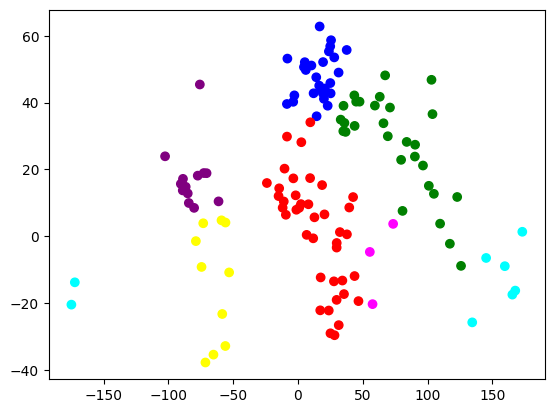

In [4]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

**QUESTION 1**

Identify each class with the plot colors:
Rouge : Afrique
Vert : Asie
Bleu : Europe
Jaune : Amérique du Sud
Magenta : Amérique du Nord
Cyan : Océanie
Violet : Seven Seas

What do the coordinates correspond to?
Les coordonnées la position géographique des pays sur une carte du monde.


**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

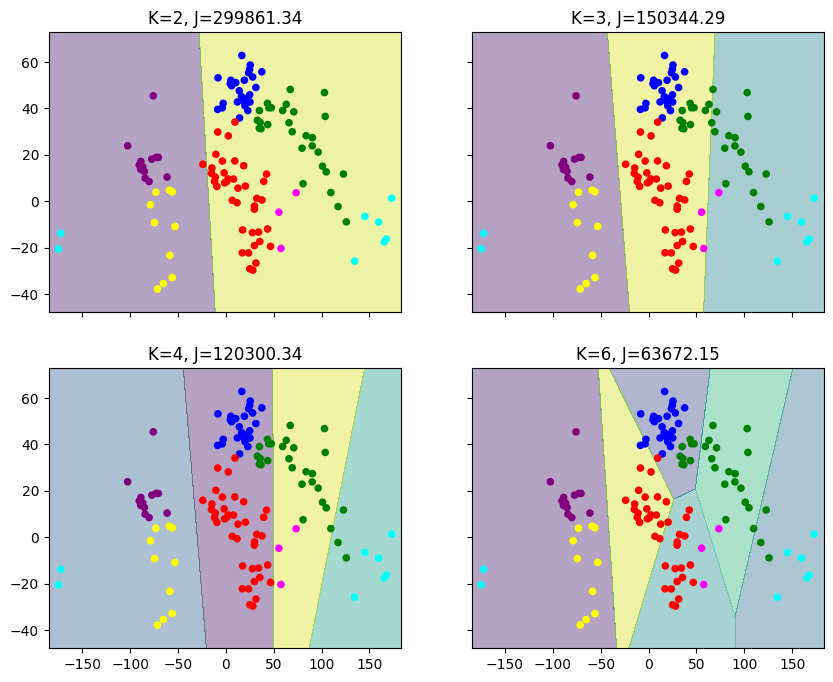

In [5]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

Which is the main problem with the mercator representation for continent detection?

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

<ipython-input-6-2064236f7593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'] - 30
<ipython-input-6-2064236f7593>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'].apply(lambda x: (x + 360 if x < -180 else x))


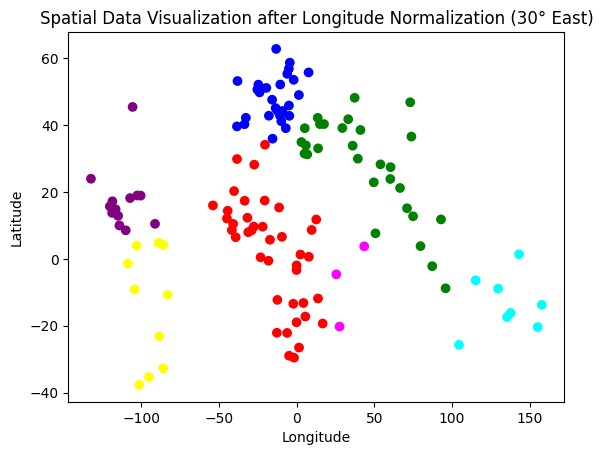

In [6]:
df_X['Longitude'] = df_X['Longitude'] - 30

df_X['Longitude'] = df_X['Longitude'].apply(lambda x: (x + 360 if x < -180 else x))

np1_normalized = df_X.to_numpy()

plt.scatter(np1_normalized[:, 0], np1_normalized[:, 1], c=np_Y,
            cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.title('Spatial Data Visualization after Longitude Normalization (30° East)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**QUESTION 3**

What are the advantages of this normalization?
La normalisation de la longitude permet de rendre les distances géographiques plus cohérentes et Cela évite que des points proches dans le monde réel soient séparés artificiellement sur la carte

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

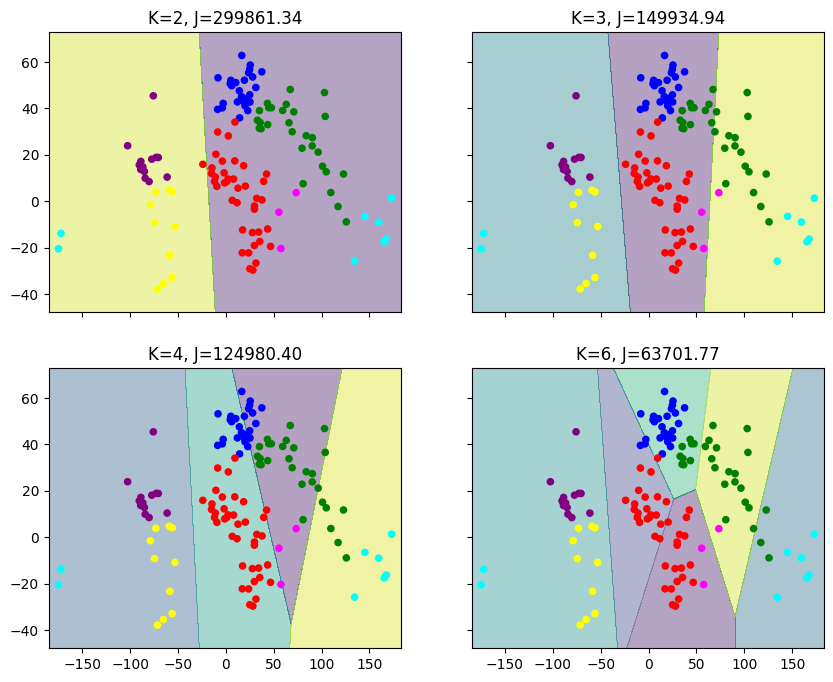

In [7]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

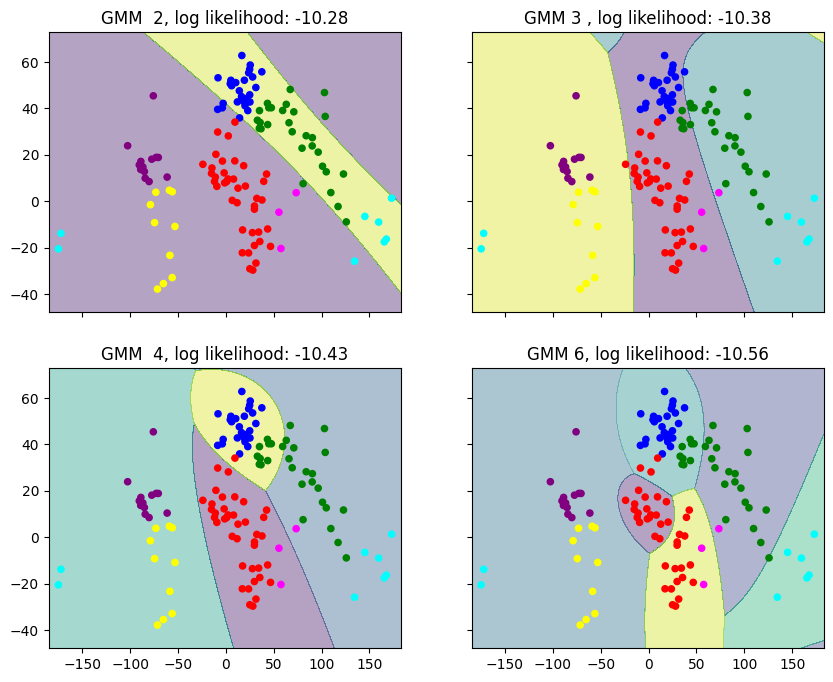

In [8]:
from itertools import product
from sklearn.mixture import GaussianMixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gmm2 = GaussianMixture(n_components=2,random_state=42).fit(np1)
gmm3 = GaussianMixture(n_components=3,random_state=42).fit(np1)
gmm4 = GaussianMixture(n_components=4,random_state=42).fit(np1)
gmm6 = GaussianMixture(n_components=6,random_state=42).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                           [gmm2, gmm3, gmm4, gmm6],
                           ["GMM  2, log likelihood: %.2f" % gmm2.score(df_X),
                            "GMM 3 , log likelihood: %.2f" % gmm3.score(df_X),
                            "GMM  4, log likelihood: %.2f" % gmm4.score(df_X),
                            "GMM 6, log likelihood: %.2f" % gmm6.score(df_X)]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

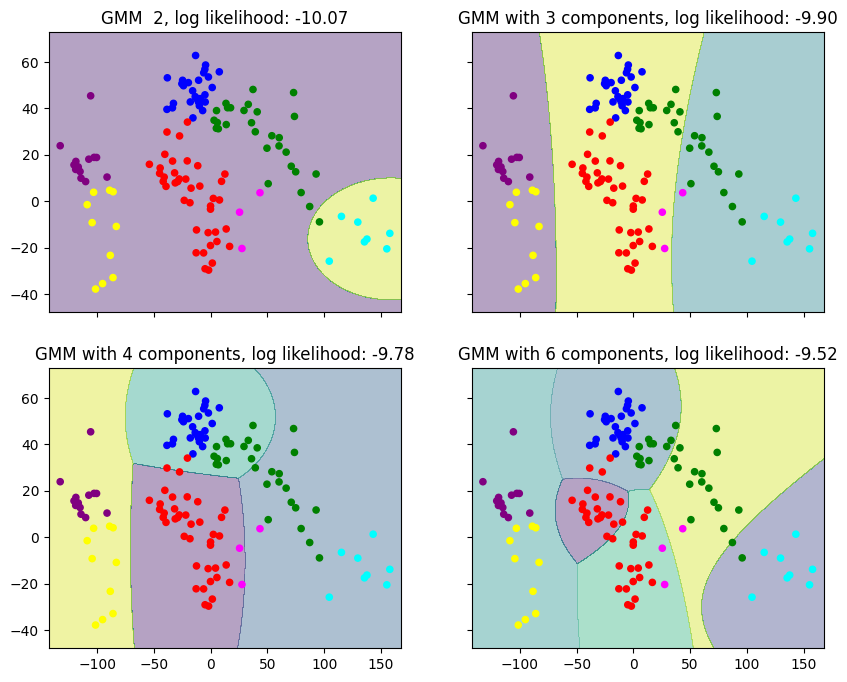

In [ ]:
from itertools import product
from sklearn.mixture import GaussianMixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gmm2 = GaussianMixture(n_components=2,covariance_type='diag',random_state=42).fit(np1)
gmm3 = GaussianMixture(n_components=3,covariance_type='diag',random_state=42).fit(np1)
gmm4 = GaussianMixture(n_components=4,covariance_type='diag',random_state=42).fit(np1)
gmm6 = GaussianMixture(n_components=6,covariance_type='diag',random_state=42).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                           [gmm2, gmm3, gmm4, gmm6],
                           ["GMM  2, log likelihood: %.2f" % gmm2.score(df_X),
                            "GMM with 3 components, log likelihood: %.2f" % gmm3.score(df_X),
                            "GMM with 4 components, log likelihood: %.2f" % gmm4.score(df_X),
                            "GMM with 6 components, log likelihood: %.2f" % gmm6.score(df_X)]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

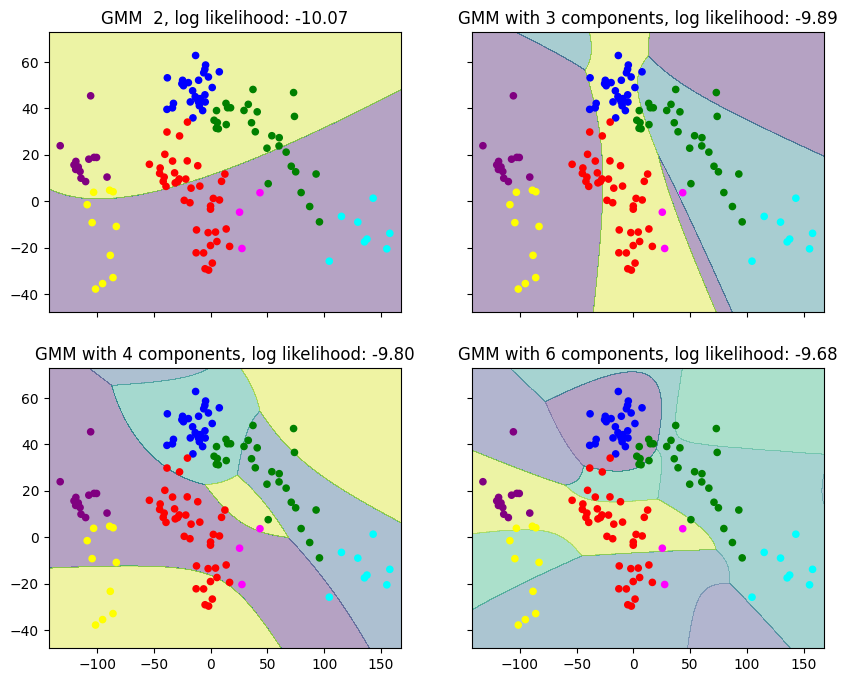

In [ ]:
from itertools import product
from sklearn.mixture import GaussianMixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gmm2 = GaussianMixture(n_components=2,init_params='random',random_state=42).fit(np1)
gmm3 = GaussianMixture(n_components=3,init_params='random',random_state=42).fit(np1)
gmm4 = GaussianMixture(n_components=4,init_params='random',random_state=42).fit(np1)
gmm6 = GaussianMixture(n_components=6,init_params='random',random_state=42).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                           [gmm2, gmm3, gmm4, gmm6],
                           ["GMM  2, log likelihood: %.2f" % gmm2.score(df_X),
                            "GMM 3 , log likelihood: %.2f" % gmm3.score(df_X),
                            "GMM 4 , log likelihood: %.2f" % gmm4.score(df_X),
                            "GMM  6 , log likelihood: %.2f" % gmm6.score(df_X)]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 4**

Which is the best method to detect continents?
The best method to detect continents is GMM with the full covariance matrix. This is because it allows each continent to have a flexible shape, and can capture the natural shapes of continents better than using a diagonal covariance or rigid methods like K-Means.

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?
 the probability of finding those countries  would be very low. These coordinates are in the South Atlantic Ocean, far from any inhabited land, and GMM would assign a low probability to such locations since they don't belong to any continent cluster.

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

## STEP 3: Detection of caribbean island

**TO CODE 3.1**

Isolate the North and South American continents.

<ipython-input-9-f459fcb42a60>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y_americas = df_Status_americas.replace(['North America', 'South America'], [0, 1])


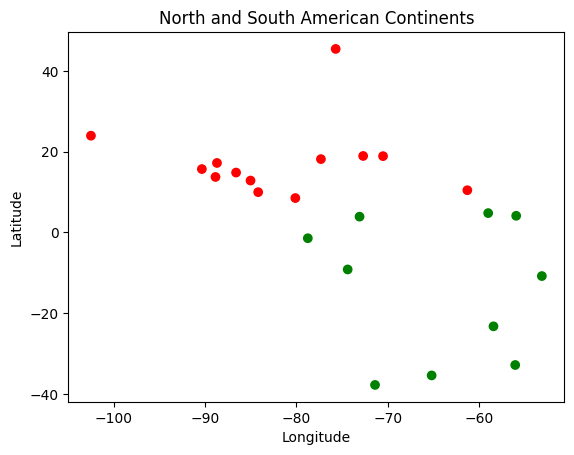

In [9]:
# Isolating North and South American continents
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

# Filter for North and South American continents
df_Americas = df1[df1['Continent'].isin(['North America', 'South America'])]


df_X_americas = df_Americas[['Longitude', 'Latitude']]
df_Status_americas = df_Americas[['Continent']]


df_Y_americas = df_Status_americas.replace(['North America', 'South America'], [0, 1])
np_Y = df_Y_americas.to_numpy().reshape((df_Y_americas.shape[0],))

np1 = df_X_americas.to_numpy()


plt.scatter(np1[:, 0], np1[:, 1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('North and South American Continents')
plt.show()


**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

<ipython-input-13-aef8477d2066>:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y_combined = df_combined['Continent'].replace(continent_to_code).to_numpy()


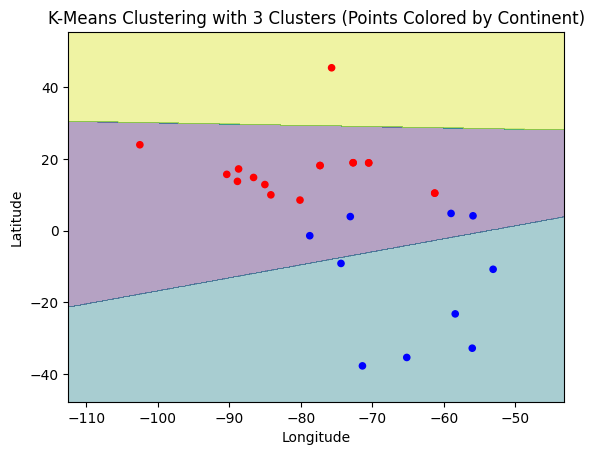

In [13]:
from sklearn.cluster import KMeans


caribbean_countries = ['Cuba', 'Haiti', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago',
                       'Bahamas', 'Barbados', 'Saint Lucia', 'Grenada', 'Saint Vincent and the Grenadines']

df_caribbean = df1[df1['Country'].isin(caribbean_countries)]
df_X_caribbean = df_caribbean[['Longitude', 'Latitude']]

#  Update the Data to include Caribbean countries
df_Americas = df1[df1['Continent'].isin(['North America', 'South America'])]
df_combined = pd.concat([df_Americas, df_caribbean])

# Extract longitude and latitude
df_X_combined = df_combined[['Longitude', 'Latitude']]
np_combined = df_X_combined.to_numpy()



x_min, x_max = np_combined[:, 0].min() - 10, np_combined[:, 0].max() + 10
y_min, y_max = np_combined[:, 1].min() - 10, np_combined[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

kmeans = KMeans(n_clusters=3, random_state=42).fit(np_combined)


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)


continents = ['North America', 'South America', 'Caribbean']
continent_to_code = dict(zip(continents, [0, 1, 2]))
df_Y_combined = df_combined['Continent'].replace(continent_to_code).to_numpy()

plt.scatter(np_combined[:, 0], np_combined[:, 1], c=df_Y_combined,
            s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering with 3 Clusters (Points Colored by Continent)')
plt.show()

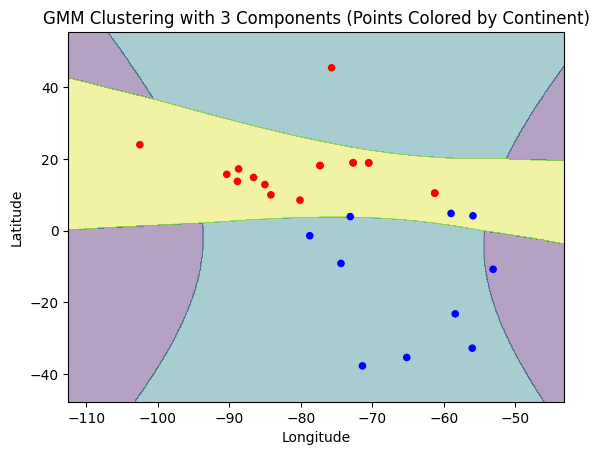

In [14]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3, init_params='random', random_state=42).fit(np_combined)


Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)


plt.scatter(np_combined[:, 0], np_combined[:, 1], c=df_Y_combined,
            s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GMM Clustering with 3 Components (Points Colored by Continent)')
plt.show()

**QUESTION 5**

Which is the outlier of this clustering problem?

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

<ipython-input-15-b095ea182d7b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


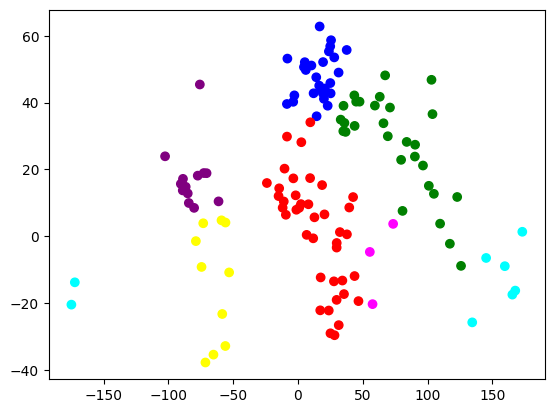

In [15]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [16]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5294149389828594


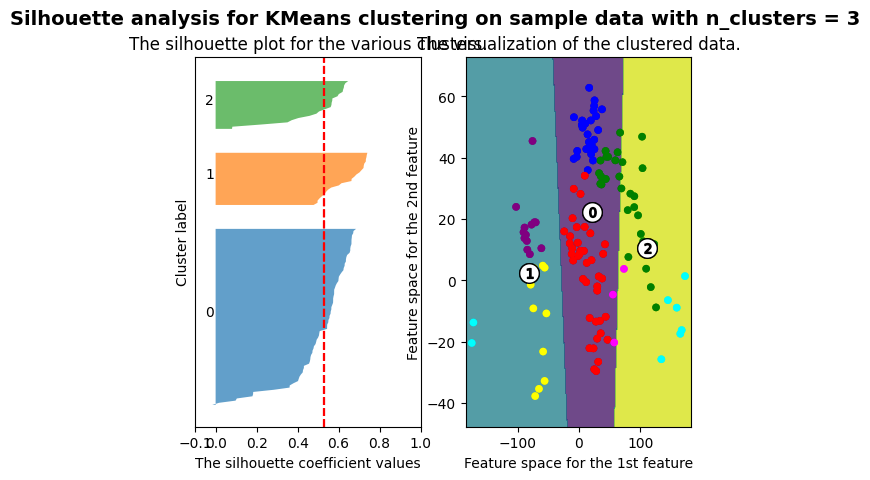

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

Pour n_clusters = 2, le score silhouette moyen est de : 0.42


<ipython-input-19-b0603656dd2d>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s=20, cmap=plt.cm.get_cmap('rainbow', 7))


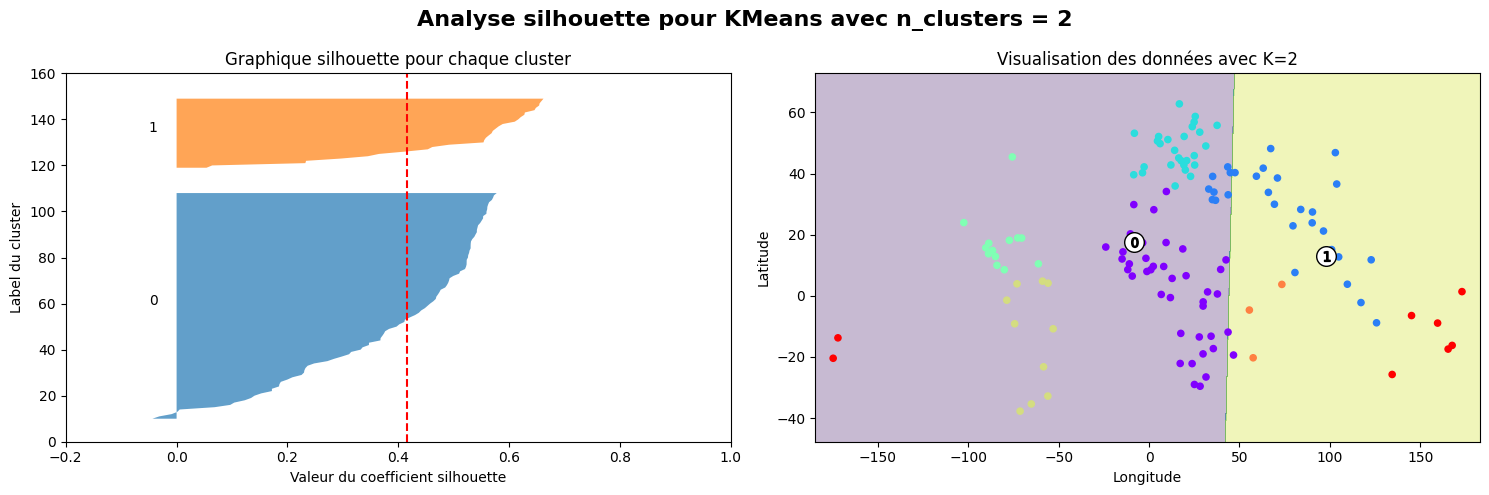

Pour n_clusters = 3, le score silhouette moyen est de : 0.53


<ipython-input-19-b0603656dd2d>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s=20, cmap=plt.cm.get_cmap('rainbow', 7))


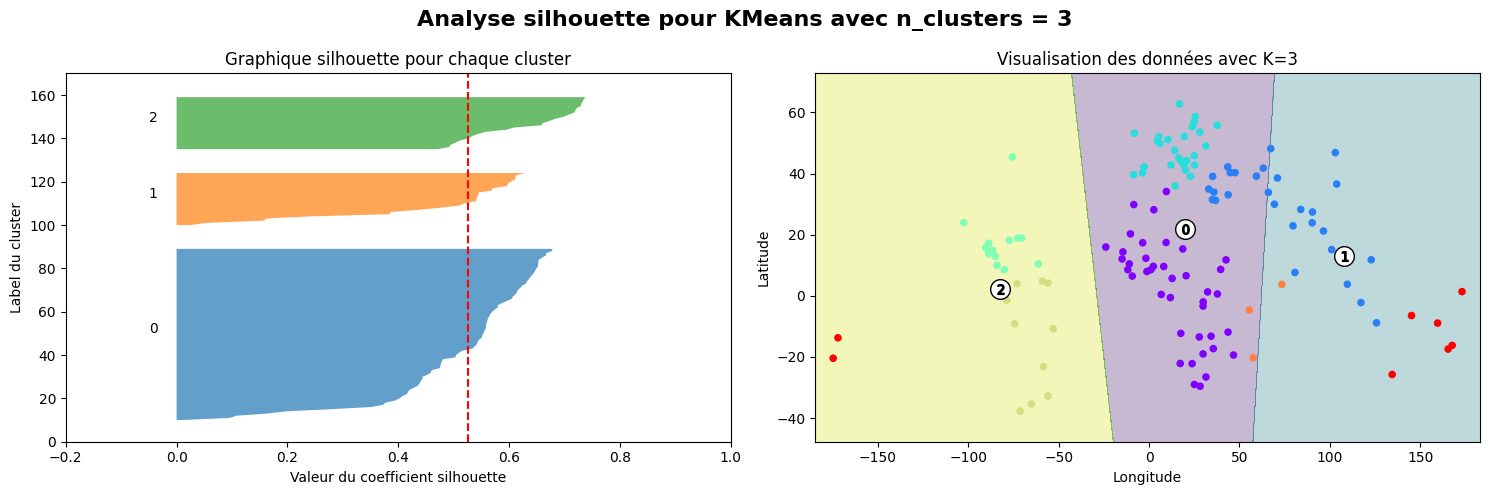

Pour n_clusters = 4, le score silhouette moyen est de : 0.48


<ipython-input-19-b0603656dd2d>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s=20, cmap=plt.cm.get_cmap('rainbow', 7))


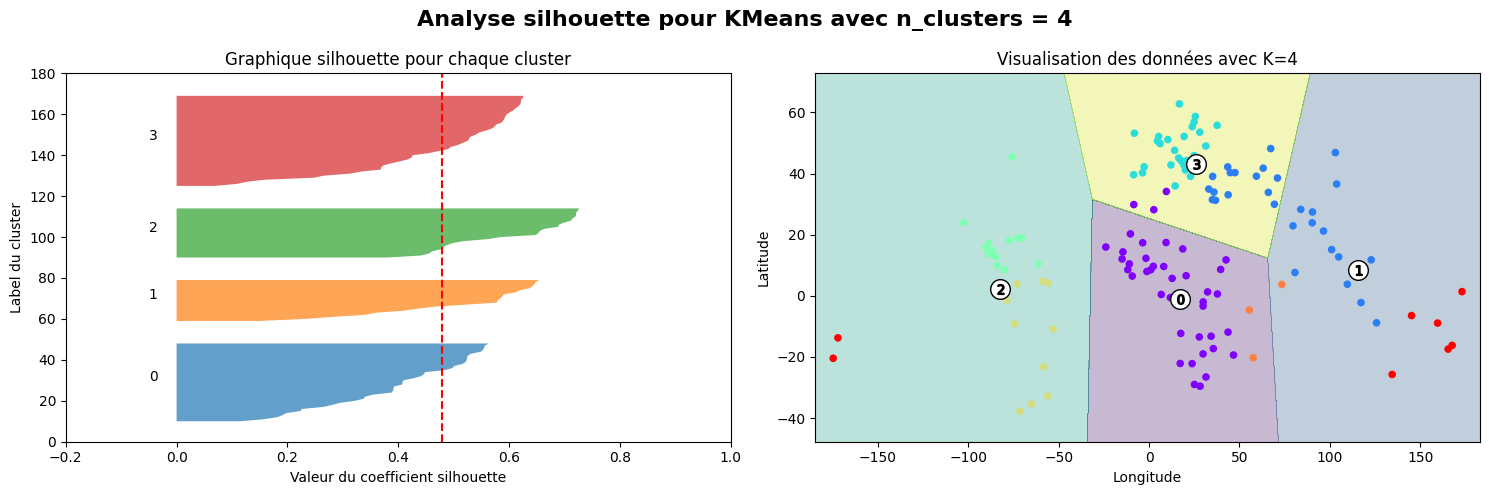

Pour n_clusters = 6, le score silhouette moyen est de : 0.50


<ipython-input-19-b0603656dd2d>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s=20, cmap=plt.cm.get_cmap('rainbow', 7))


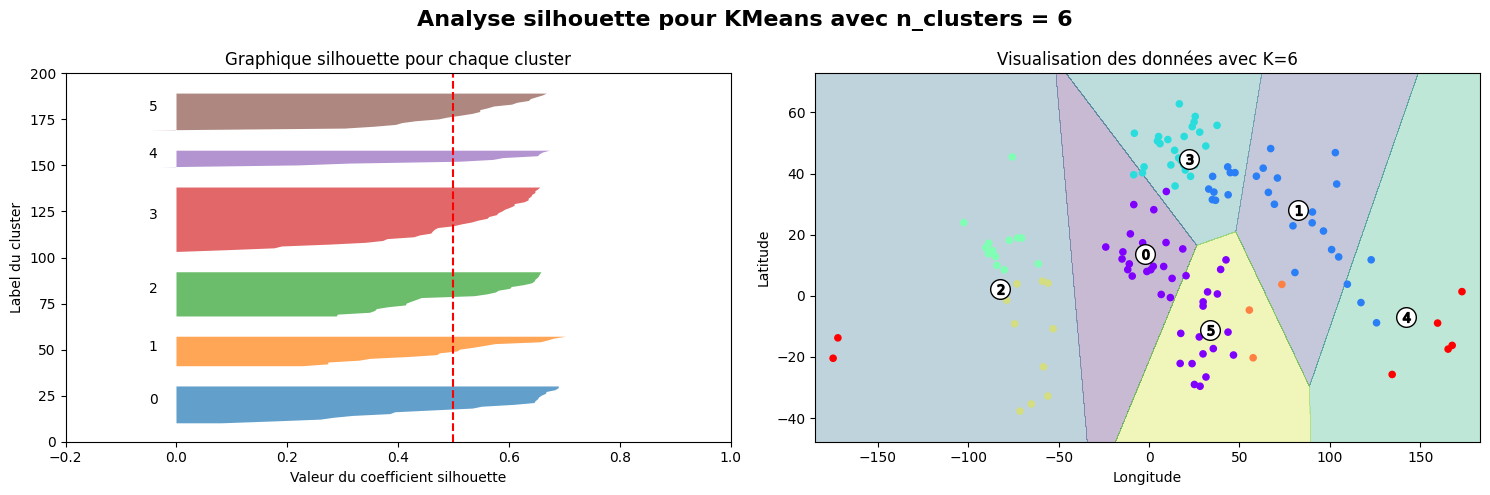

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score



k_values = [2, 3, 4, 6]

for k in k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(np1) + (k + 1) * 10])

    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(np1)


    avg_silhouette = silhouette_score(np1, cluster_labels)
    print(f"Pour n_clusters = {k}, le score silhouette moyen est de : {avg_silhouette:.2f}")

    silhouette_vals = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        cluster_size = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + cluster_size

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10  # Ajouter un espace entre les clusters

    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")
    ax1.set_title("Graphique silhouette pour chaque cluster")
    ax1.set_xlabel("Valeur du coefficient silhouette")
    ax1.set_ylabel("Label du cluster")

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.3)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=plt.cm.get_cmap('rainbow', 7))


    cluster_centers = kmeans.cluster_centers_
    ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                c='white', s=200, marker='o', edgecolor='k')

    for i, c in enumerate(cluster_centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", c='black', s=50, edgecolor='k')

    ax2.set_title(f"Visualisation des données avec K={k}")
    ax2.set_xlabel("Longitude")
    ax2.set_ylabel("Latitude")

    plt.suptitle(f"Analyse silhouette pour KMeans avec n_clusters = {k}", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


**Question 6**

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

**BONUS**

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

Pour n_clusters = 2, le score d'homogénéité est : 0.2031
Pour n_clusters = 3, le score d'homogénéité est : 0.4302
Pour n_clusters = 4, le score d'homogénéité est : 0.6165
Pour n_clusters = 6, le score d'homogénéité est : 0.6923


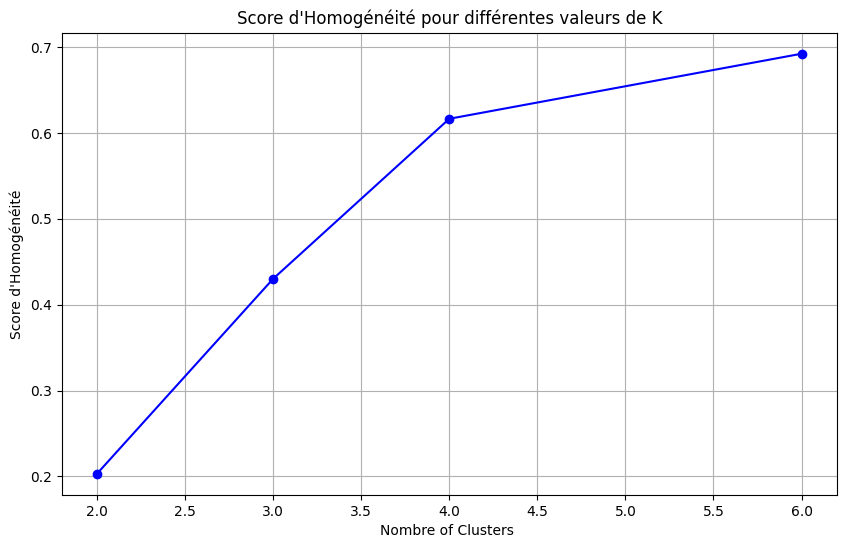

In [21]:
from sklearn.metrics import homogeneity_score


k_values = [2, 3, 4, 6]

homogeneity_scores = []


for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(np1)
    score = homogeneity_score(np_Y, cluster_labels)
    homogeneity_scores.append({'K': k, 'homogeneity_score': score})

for result in homogeneity_scores:
    print(f"Pour n_clusters = {result['K']}, le score d'homogénéité est : {result['homogeneity_score']:.4f}")


k_vals = [result['K'] for result in homogeneity_scores]
scores = [result['homogeneity_score'] for result in homogeneity_scores]

plt.figure(figsize=(10, 6))
plt.plot(k_vals, scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Nombre of Clusters ')
plt.ylabel('Score d\'Homogénéité')
plt.title('Score d\'Homogénéité pour différentes valeurs de K')
plt.grid(True)
plt.show()


**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

Based on the graph, the most relevant value of K is 6 because it gives the highest homogeneity score, indicating that the clusters are more homogeneous when divided into 6 groups compared to the other  K

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?

QUESTION 1

In the year 2000, which countries are heavily concerned by an Alcohol issue?